<a href="https://colab.research.google.com/github/albarabimakasa/internships/blob/main/Bi_lstm_Bara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard Data Science Libraries
import pickle
import math
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras import layers

# Neural Net Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Neural Net Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

# Neural Net Training
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from pickle import load

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [2]:
from google.colab import files
myfiles = files.upload()


Saving train.csv to train.csv


In [3]:
# Import the data
train_df = pd.read_csv('train.csv')

In [4]:
train_df

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


In [5]:
# Selecting Edgar Allen Poe as author style to emulate
author = train_df[train_df['author']=='EAP']["text"]
print('Number of training sentences: ',author.shape[0])

Number of training sentences:  7900


In [6]:

max_words = 50000 # Max size of the dictionary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(author.values)
sequences = tokenizer.texts_to_sequences(author.values)
print(sequences[:5])

[[19, 2397, 80, 1001, 29, 31, 177, 2, 4073, 1, 1960, 2, 11, 3024, 15, 7, 110, 157, 41, 2146, 3, 481, 4, 1, 149, 2147, 7, 393, 74, 114, 101, 439, 2, 1, 162, 32, 913, 6453, 136, 1, 380], [6, 21, 142, 150, 10, 5, 551, 2148, 319, 28, 16, 15, 20, 8999, 128, 1, 3025, 2398, 30, 171, 2, 1797, 697, 20, 180, 2148, 6454, 12, 33, 188, 2, 1, 869, 243, 522, 1264], [1, 6455, 203, 14, 19, 149, 180, 6456, 6, 1, 1357, 2, 1358, 9000, 3, 83, 2149, 10, 355, 140, 794], [1, 4074, 491, 6, 9001, 28, 11, 158], [7, 287, 9, 36, 48, 22, 73, 4, 644, 9002, 114, 101, 346, 4, 271, 2, 9003, 3, 81, 2, 1, 3026, 2, 6457, 3, 282, 53, 34, 6458, 19, 339, 22, 43, 97, 608, 7, 450, 4, 36, 133, 1191, 88, 12, 133, 71, 914, 1, 759, 3027, 2, 9, 1445, 1359, 18, 760, 12, 4973, 6, 1, 421, 9004, 9005, 7, 214, 9, 36, 48, 22, 3449, 3028, 98, 124, 1192, 4, 1, 92, 9006, 6, 3450, 3, 7, 761, 870, 9, 36, 55, 111, 32]]


In [7]:
# Flatten the list of lists resulting from the tokenization. This will reduce the list
# to one dimension, allowing us to apply the sliding window technique to predict the next word
text = [item for sublist in sequences for item in sublist]
vocab_size = len(tokenizer.word_index)

In [8]:
print('Vocabulary size in this corpus: ', vocab_size)

Vocabulary size in this corpus:  15713


In [9]:
# Training on 19 words to predict the 20th
sentence_len = 20
pred_len = 1
train_len = sentence_len - pred_len
seq = []
# Sliding window to generate train data
for i in range(len(text)-sentence_len):
    seq.append(text[i:i+sentence_len])
# Reverse dictionary to decode tokenized sequences back to words
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

# Save tokenizer
# dump(tok, open('tokenizer.pkl', 'wb'))

In [10]:
# Each row in seq is a 20 word long window. We append he first 19 words as the input to predict the 20th word
trainX = []
trainy = []
for i in seq:
    trainX.append(i[:train_len])
    trainy.append(i[-1])

In [ ]:
# define model
model = Sequential([
    Embedding(vocab_size+1, 50, input_length=train_len),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(100, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [14]:
model1 = Sequential()
model1.add(Embedding(vocab_size+1, 50, input_length=train_len))
model1.add(Bidirectional(LSTM(100, return_sequences=True)))
model1.add(Dropout(0.2))
model1.add(LSTM(100))
model1.add(Dense(vocab_size, activation='Softmax'))

In [15]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 19, 50)            785700    
                                                                 
 bidirectional (Bidirectiona  (None, 19, 200)          120800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               120400    
                                                                 
 dense (Dense)               (None, 15713)             1587013   
                                                                 
Total params: 2,613,913
Trainable params: 2,613,913
Non-trainable params: 0
____________________________________________

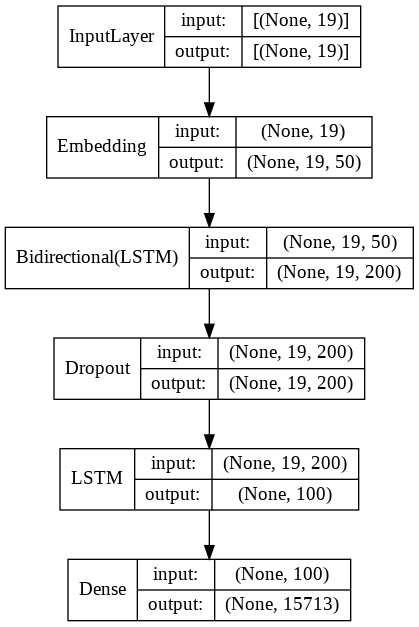

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file ='model_BI_LSTM.png', show_shapes=True,show_layer_names=False)

In [20]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 19, 50)            785700    
                                                                 
 bidirectional (Bidirectiona  (None, 19, 200)          120800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 200)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               120400    
                                                                 
 dense (Dense)               (None, 15713)             1587013   
                                                                 
Total params: 2,613,913
Trainable params: 2,613,913
Non-trainable params: 0
____________________________________________

In [25]:
# fit model................................
history = model1.fit(np.asarray(trainX), pd.get_dummies(np.asarray(trainy)), batch_size=128, epochs=100,verbose =1,validation_split=0.2)

Epoch 1/100
1257/1257 [==============================] - 328s 256ms/step - loss: 6.8477 - accuracy: 0.0880 - val_loss: 6.5579 - val_accuracy: 0.1019
Epoch 2/100
1257/1257 [==============================] - 319s 254ms/step - loss: 6.2877 - accuracy: 0.1113 - val_loss: 6.4385 - val_accuracy: 0.1131
Epoch 3/100
1257/1257 [==============================] - 312s 249ms/step - loss: 6.0736 - accuracy: 0.1277 - val_loss: 6.3930 - val_accuracy: 0.1214
Epoch 4/100
1257/1257 [==============================] - 312s 248ms/step - loss: 5.9195 - accuracy: 0.1355 - val_loss: 6.3777 - val_accuracy: 0.1234
Epoch 5/100
1257/1257 [==============================] - 315s 250ms/step - loss: 5.7963 - accuracy: 0.1411 - val_loss: 6.3974 - val_accuracy: 0.1232
Epoch 6/100
1257/1257 [==============================] - 313s 249ms/step - loss: 5.6863 - accuracy: 0.1459 - val_loss: 6.4181 - val_accuracy: 0.1261
Epoch 7/100
1257/1257 [==============================] - 313s 249ms/step - loss: 5.5820 - accuracy: 0.1501

In [26]:
evaluation = model1.evaluate(np.asarray(trainX),pd.get_dummies(np.asarray(trainy)))
print('accuration:{:.2f}'.format(evaluation[1]*100))

6284/6284 [==============================] - 173s 28ms/step - loss: 3.9302 - accuracy: 0.4574
accuration:45.74


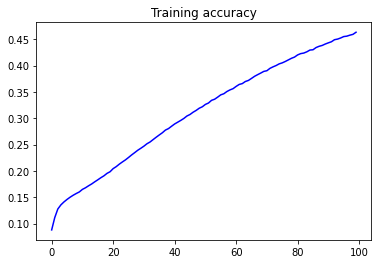

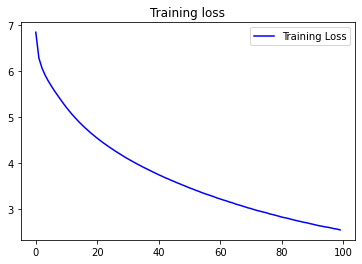

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [28]:
from google.colab import files
myfiles = files.upload()

Saving test.csv to test.csv


In [ ]:
# Import the data
test_df = pd.read_csv('test.csv')

In [ ]:
test_df

In [ ]:
y_pred = history.predict(test_df)

In [ ]:
y_pred = 